In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df=pd.read_excel('data/sample.xlsx')
df.head()

,Date,Gender,Region,Savings Account,Merchant,Customers,Spend,Transactions,Age,Annual Salary,Account Type
0,2018-01,F,Region1,No,Merchant X,5,755.969995,16,43.600000,22190.16016,CC_only
1,2018-01,F,Region1,No,Merchant Z,15,2476.319986,65,41.666667,24281.88086,CC_only
2,2018-01,F,Region1,No,Merchant Y,21,1447.930008,53,36.285714,38809.92057,CC_only
3,2018-01,F,Region1,No,Merchant X,134,7751.799956,388,33.897964,24596.98421,MTA_only
4,2018-01,F,Region1,No,Merchant Z,247,18827.329980,1035,34.234351,25175.56021,MTA_only


In [79]:
df.shape

(2441, 11)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             2441 non-null   object 
 1   Gender           2441 non-null   object 
 2   Region           2441 non-null   object 
 3   Savings Account  2441 non-null   object 
 4   Merchant         2441 non-null   object 
 5   Customers        2441 non-null   int64  
 6   Spend            2441 non-null   float64
 7   Transactions     2441 non-null   int64  
 8   Age              2441 non-null   float64
 9   Annual Salary    2261 non-null   float64
 10  Account Type     2441 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 209.9+ KB


In [81]:
df.isnull().sum()

Date                 0
Gender               0
Region               0
Savings Account      0
Merchant             0
Customers            0
Spend                0
Transactions         0
Age                  0
Annual Salary      180
Account Type         0
dtype: int64

In [82]:
df['Annual Salary'].fillna(float(df['Annual Salary'].mean()), inplace=True)
df.isnull().sum()

Date               0
Gender             0
Region             0
Savings Account    0
Merchant           0
Customers          0
Spend              0
Transactions       0
Age                0
Annual Salary      0
Account Type       0
dtype: int64

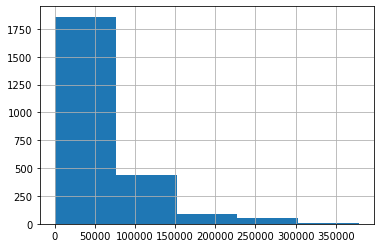

In [83]:
df['Spend'].hist(bins=5)

In [84]:
df.value_counts()

Date     Gender  Region   Savings Account  Merchant    Customers  Spend          Transactions  Age        Annual Salary  Account Type
2019-12  M       Region3  Yes              Merchant Z  1467       119283.088200  6272          31.510182  25563.53064    MTA_only        1
2018-09  M       Region2  No               Merchant X  399        27274.749770   1109          36.225520  26749.86608    MTA_CC          1
                                           Merchant Z  1677       101662.449800  6023          30.455457  22700.40701    MTA_only        1
                                                       635        54457.559490   2477          35.238250  27378.69789    MTA_CC          1
                                                       119        9685.820038    399           35.933936  32483.76938    CC_only         1
                                                                                                                                        ..
2019-05  F       Region2  Yes   

Q1. The Product and Marketing Director of Supermarket Z would like to introduce a new spend reward credit card to customers in a bid to :

* Gain a share of the credit card market where currently they have no offering, they currently only operate a loyalty card

* Drive increased spend in its stores by launching the credit card

In [17]:
grouped_multiple = df.groupby(['Account Type','Gender','Region','Age'])['Spend'].mean().reset_index()
grouped_multiple = pd.DataFrame(grouped_multiple)

grouped_multiple.columns = [''.join(col) for col in grouped_multiple.columns]
grouped_multiple['Spend']=pd.to_numeric(grouped_multiple['Spend'])
grouped_multiple['Spend'].round(decimals = 1)
grouped_multiple


,Account Type,Gender,Region,Age,Spend
0,CC_only,F,Region1,21.000000,1.850000
1,CC_only,F,Region1,25.000000,38.040001
2,CC_only,F,Region1,26.000000,43.440000
3,CC_only,F,Region1,28.000000,82.515005
4,CC_only,F,Region1,28.500000,172.529995
...,...,...,...,...,...
2340,MTA_only,M,Region3,33.779221,22108.000040
2341,MTA_only,M,Region3,33.831756,12793.349950
2342,MTA_only,M,Region3,34.026641,39301.889910
2343,MTA_only,M,Region3,34.066483,10138.940090


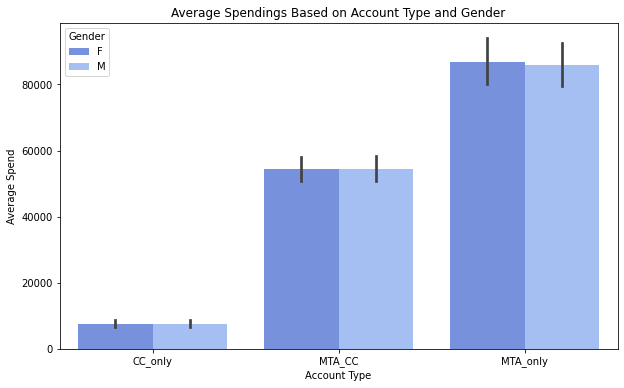

In [18]:
plt.figure(figsize=(10, 6))
color=sns.color_palette("coolwarm")
sns.barplot(x='Account Type', hue='Gender', y="Spend", data=grouped_multiple, palette=color)
plt.ylabel('Average Spend')
plt.xlabel('Account Type')
plt.title('Average Spendings Based on Account Type and Gender')
plt.show()


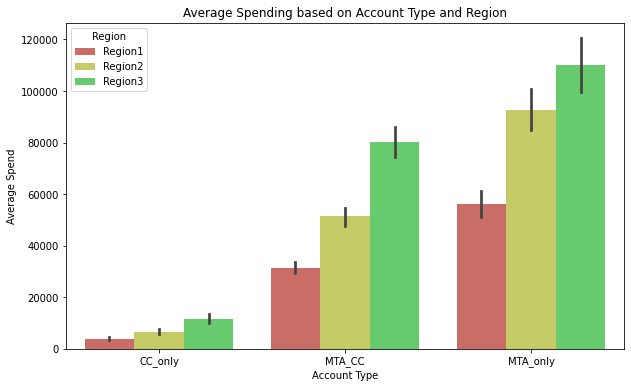

In [45]:
plt.figure(figsize=(10, 6))
color=sns.color_palette("hls")
sns.barplot(x='Account Type', hue='Region', y="Spend", data=grouped_multiple, palette=color)
plt.ylabel('Average Spend')
plt.xlabel('Account Type')
plt.title('Average Spending based on Account Type and Region')
plt.show()


In [46]:
import numpy as np

corr = np.corrcoef(grouped_multiple['Age'],grouped_multiple['Spend'])
df.groupby('Account Type')[['Age','Spend']].corr()

Age     Spend
Account Type                          
CC_only      Age    1.000000 -0.186396
             Spend -0.186396  1.000000
MTA_CC       Age    1.000000 -0.600506
             Spend -0.600506  1.000000
MTA_only     Age    1.000000 -0.547424
             Spend -0.547424  1.000000

In [26]:
saving = df.groupby(['Account Type','Savings Account','Merchant'])['Spend'].mean().reset_index()
saving


,Account Type,Savings Account,Merchant,Spend
0,CC_only,No,Merchant X,3995.149567
1,CC_only,No,Merchant Y,18854.656956
2,CC_only,No,Merchant Z,14672.319711
3,CC_only,Yes,Merchant X,90.764393
4,CC_only,Yes,Merchant Y,555.306323
5,CC_only,Yes,Merchant Z,327.099376
6,MTA_CC,No,Merchant X,22725.034123
7,MTA_CC,No,Merchant Y,95007.623326
8,MTA_CC,No,Merchant Z,68599.221287
9,MTA_CC,Yes,Merchant X,14984.888030


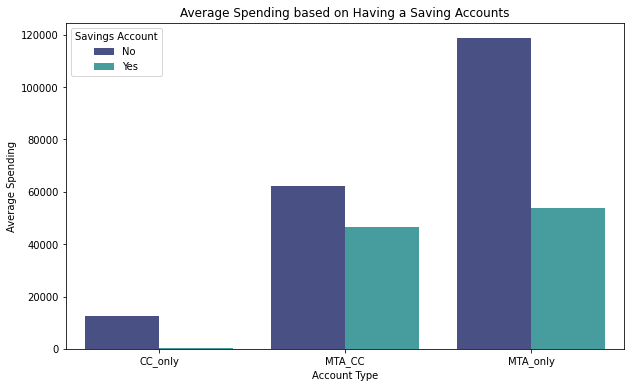

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Account Type', hue='Savings Account', y="Spend", data=saving, palette='mako', ci=None)
plt.ylabel('Average Spending')
plt.xlabel('Account Type')
plt.title('Average Spending based on Having a Saving Accounts')
plt.show()

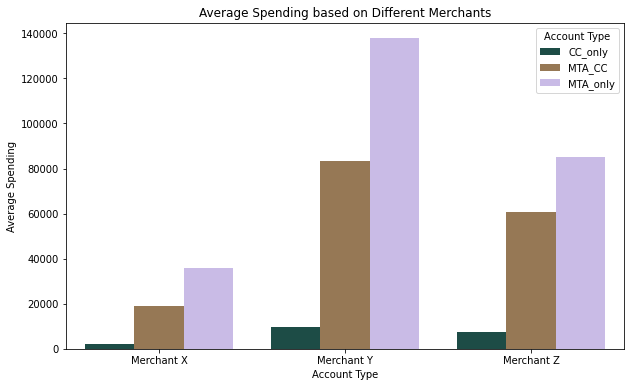

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Merchant', hue='Account Type', y="Spend", data=saving, palette='cubehelix', ci=None)
plt.ylabel('Average Spending')
plt.xlabel('Account Type')
plt.title('Average Spending based on Different Merchants')
plt.show()

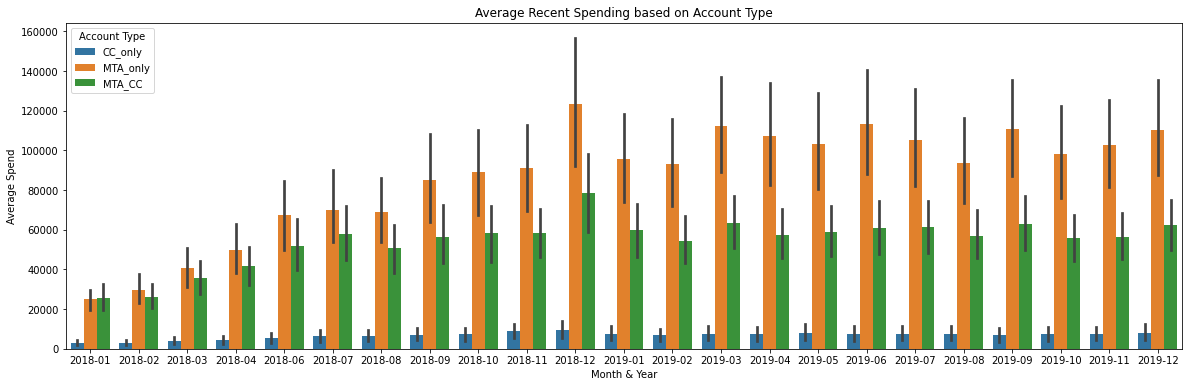

In [54]:
plt.figure(figsize=(20, 6))
color=sns.color_palette("tab10")
sns.barplot(x='Date', hue='Account Type', y="Spend", data=df, palette=color)
plt.ylabel('Average Spend')
plt.xlabel('Month & Year')
plt.title('Average Recent Spending based on Account Type')
plt.show()

In [141]:
df['Salary Classification']=pd.cut(df['Annual Salary'], bins=[0.0,20000.0,30000.0,122000.0], include_lowest=True, labels=['Low salary','Average salary','High salary'])

In [142]:
df

,Date,Gender,Region,Savings Account,Merchant,Customers,Spend,Transactions,Age,Annual Salary,Account Type,Salary Classification
0,2018-01,F,Region1,No,Merchant X,5,755.969995,16,43.600000,22190.16016,CC_only,Average salary
1,2018-01,F,Region1,No,Merchant Z,15,2476.319986,65,41.666667,24281.88086,CC_only,Average salary
2,2018-01,F,Region1,No,Merchant Y,21,1447.930008,53,36.285714,38809.92057,CC_only,High salary
3,2018-01,F,Region1,No,Merchant X,134,7751.799956,388,33.897964,24596.98421,MTA_only,Average salary
4,2018-01,F,Region1,No,Merchant Z,247,18827.329980,1035,34.234351,25175.56021,MTA_only,Average salary
...,...,...,...,...,...,...,...,...,...,...,...,...
2436,2019-12,M,Region3,Yes,Merchant Z,1467,119283.088200,6272,31.510182,25563.53064,MTA_only,Average salary
2437,2019-12,M,Region3,Yes,Merchant Y,1675,140296.180800,7869,30.892663,24743.78859,MTA_only,Average salary
2438,2019-12,M,Region3,Yes,Merchant X,285,36851.680040,747,36.981574,28486.64450,MTA_CC,Average salary
2439,2019-12,M,Region3,Yes,Merchant Z,994,109566.431400,4480,35.275935,30046.30466,MTA_CC,High salary


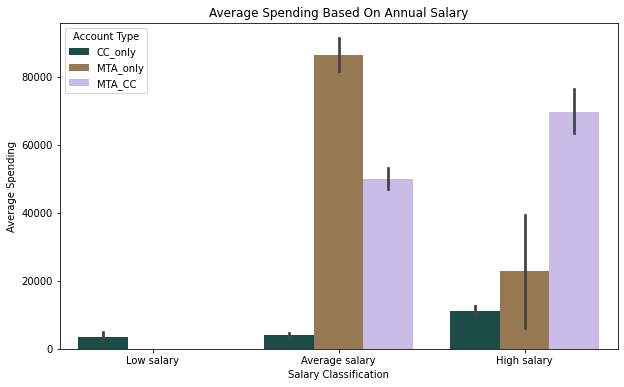

In [145]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Salary Classification', hue='Account Type', y="Spend", data=df, palette='cubehelix')
plt.ylabel('Average Spending')
plt.xlabel('Salary Classification')
plt.title('Average Spending Based On Annual Salary')
plt.show()